<a href="https://colab.research.google.com/github/tamgerine/Math-152/blob/main/exploratoryproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2: Random Walk
Mod 5 Squad: August, Aziz, Iris, Jacob, Tamara 


#Overview
A random walk is a particle, or bot, moving through space, whose immediate next movement is randomly determined at each time state. There are many variations of random walks.

We began out exploration for random walk without a lot of direction. We found our way towards walls and bounds, and how they affect the diffusion and paths of our random walkers. We modeled two different versions. The first simulates the heatmap of a smaller number of bots released inside a box. The second focus was on a much larger number of bots released in the open, with a horizontal wall not far above them. In this second version, we focused more on interactions with the wall.

# Import Packages



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.core.multiarray import zeros
from collections import Counter

# Random Walk In A Box

The first part of our exploration ceners around the paths taken by random walkers let loose in a box such that they bounce off the edges. Instead of focucsing on end points, tracked which points where most walked on. With a suffiently large number of bots, or steps, it is easy to blot out the chart fully with the paths they took. However, when looking at fewer bots, it is very interesting to see how often, by random chance, they end up staying in their own areas.

The code below works through the definition of two functions. The first of which is responsible for a single random walker. It takes the number of steps and the size of the box as inputs. it operates by looping through the number of steps, moving a walker randomly in some direction each time.

In [2]:
def rectangle_random_walk(n, w, l): #n - number of steps, w - width of rectangle, l - length of rectangle
  #Initialize variables 
  x = 0
  y = 0 
  xar = np.zeros([1])
  yar = np.zeros([1])

  #Loop for executing the random walk
  for i in range(n):
    if np.random.rand() < 0.5: #Moving left or right
      x = x + 1  
      xar = np.append(xar, [x])
    else:
      x = x - 1
      xar = np.append(xar, [x])
     
    if np.random.rand() < 0.5: #Moving up or down
      y = y + 1  
      yar = np.append(yar, [y])
    else:
      y = y - 1
      yar = np.append(yar, [y])

    #Checking if the random walk is still within the x-axis boundary 
    if x >= w/2:
      x = x - 1
    elif x <= -w/2:
      x = x + 1

    #Checking if the random walk is still within the y-axis boundary 
    if y >= l/2:
      y = y - 1
    elif y <= -l/2:
      y = y + 1
  x_y = np.outer(xar, yar)
  
  return xar, yar

The second function defined builds off the first, itterating it for each bot generated.

In [ ]:

def random_walk_rectangle_graph(n, w, l, t): #t - number of bots (i.e how many times rectangle_random_walk runs), w - width of rectangle, l - length of rectangle
  #Initialize variables 
  x_data = np.zeros([1])
  y_data = np.zeros([1])

  #Repeat random_walk t times for data
  for i in range(t):
    xar,yar = rectangle_random_walk(n, w, l)
    x_data = np.append(x_data, xar)
    y_data = np.append(y_data, yar)

  #Grabbing max and min values to fit the scatter plot correctly
  x_max = max(x_data)
  y_max = max(y_data)
  x_min = min(x_data)
  y_min = min(y_data)

  #Code for creating adjustable size dots from https://stackoverflow.com/questions/46700733/how-to-have-scatter-points-become-larger-for-higher-density-using-matplotlib
  c = Counter(zip(x_data,y_data))
  #Create a list of the sizes
  s = [c[(x_datax_data,y_datay_data)] for x_datax_data, y_datay_data in zip(x_data,y_data)]

  #Plot random walks
  plt.xlabel("x-values walked through")
  plt.ylabel("y-values walked through")
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.scatter(x_data, y_data, s=s,)

  #Creating a circle w/ radius sqrt(n)
  theta_list = np.arange(0,360,3.6)
  xlist = np.cos(theta_list)*np.sqrt(n)
  ylist = np.sin(theta_list)*np.sqrt(n)
  plt.scatter(xlist, ylist, s = 7)

  plt.title("Random Walker Heatmap")
  plt.show()

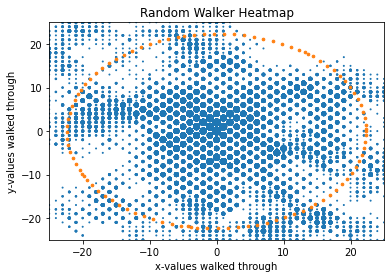

In [ ]:
random_walk_rectangle_graph(500, 50, 50, 20)
# random_walk_rectangle_graph(500, 25, 25, 10) zoomed in vesion


#Further Explination
The goal of the scatter plot was to show the frequency of any (x,y) coordinate point that the random walker appeared at, specifically inside some box. First I created my random walk function, that was bounded by a user defined rectangle. I made sure that the random walkers would bounce off the edges back into the rectangle if it got that far. The yellow circle represents the circle with a radius $\sqrt{t}$, the expected distance of a bot over a period of time.

  I created my scatter plot function to display the results. In the plots, each dot represents not just where a bot ends up, but everywhere a bot has been, and how often. Like a heatmap. The code which generates the plot would run the `rectangle_random_walk function` `t` times so that we would be able to simlulate lots of random walkers easily, giving us enough data to avoid small sample size variance. Then the function combines all this data into two arrays representing the x and y coordinate and plots them. The way I choose to show how frequent a coordinate point appeared was by adjucting the size of the dots. So a bigger dot represents that a coordinate point appeared more often in the data, i.e it was "walked on" more frequently.

  Third, I was curious as to how many random walks were geting past the average expectied distance of $\sqrt t$ where $t$ is time, or itterations. In the graph, you can see that most steps are occuring within the circle and the dots outside the circle are consistently smaller than the dots on the inside showing that they appear less frequently. This is partially due to the layering of steps.
  
 An issue with the graph is that at some point, as the values get bigger, the center just becomes a big blob, and loses the ability to show any nuance in the data in the center. A histogram would have the inverse issue as the center bins would get so tall that the outer bins would be compressed to the point of losing information.


#Random Walkers Facing A Wall

In the second leg of our project, we focused on what would happen with a far greater number of bots let loose with a wall to bounce off of. We wanted to see how their diffusion would be affected by a wall. We also tracked how many times each bot bounced off the wall with colors, leaving us with a very pretty picture renderd with Pillow.

In [7]:
#take 10000 bots!!!!
#they all start at 0,0
num_bots =10000
bots= np.zeros((num_bots,2))


In [3]:
wall_start=np.array([-5,-7])
wall_end= np.array([-5,7])

In [4]:
def bounce(line_end):#will return the new step after the bounce

  # will only be applied to bots where collision is detected

  a = wall_start[1] - wall_end[1]
  b = wall_start[0] - wall_end[0]
  c = - (a * wall_start[0] + b * wall_start[1])

  new_coord = (np.array([[b**2 - a**2, -2 * a * b],
                    [-2 * a * b, a**2 - b**2]]) @ line_end - 2 * c * np.array([a, b])) / (a**2 + b**2)

  return new_coord - line_end 

In [5]:
def collision( line_start, line_end):
  wall_x = wall_end[0] - wall_start[0]
  wall_y = wall_end[1] - wall_start[1]
  bot_x = line_end[0] - line_start[0]
  bot_y = line_end[1] - line_start[1]

  denom = wall_x * bot_y - bot_x * wall_y

  if denom == 0 : return False # collinear

  denom_is_positive = denom > 0 

  s02_x = wall_start[0] - line_start[0]
  s02_y = wall_start[1] - line_start[1]

  s_numer = wall_x * s02_y - wall_y * s02_x

  if (s_numer < 0) == denom_is_positive : return False # no collision

  t_numer = bot_x * s02_y - bot_y * s02_x

  if (t_numer < 0) == denom_is_positive : return  False # no collision

  if (s_numer > denom) == denom_is_positive or (t_numer > denom) == denom_is_positive : return False # no collision

  return True

In [10]:
#let them walk! 100 steps

#this block is quite slow
hits =  np.zeros(num_bots)#an array that counts the number of times a bot hits the wall

for t in range(100): #100 steps
  step = np.random.uniform(-1,1,(num_bots,2)) #random step
  
  bots_prime =  np.zeros(num_bots)
  for t in range(len(bots)): #bounce the bots that hit the wall furing this step
    bots_prime[t] = collision(bots[t], bots[t]+step[t]) #which bots hit this step
    if bots_prime[t]: #if they hit
      step[t] = bounce(bots[t]+step[t]) #change the step to the new calculated position
  hits = hits + bots_prime #count the number of hits this step

  bots += step #move the bots

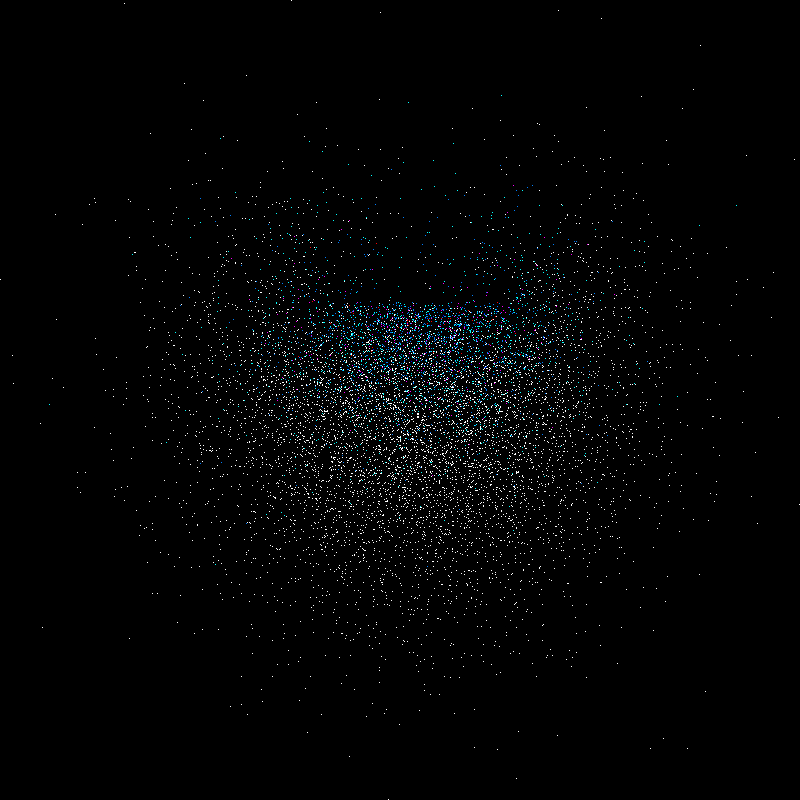

In [11]:
#pretty pictures
counts = np.histogram2d(bots[:,0],bots[:,1],bins=800)[0] #the main array that  the pixels are made from

hits12=np.array([1 if hits[i]==1 or hits[i] == 2  else 0 for i in range(len(hits)) ])[:, None]
hits345=np.array([1 if hits[i]==3 or hits[i] == 4 or hits[i]==5 else 0 for i in range(len(hits)) ])[:, None]
hits678=np.array([1 if hits[i]==6 or hits[i] == 7 or hits[i]==8 else 0 for i in range(len(hits)) ])[:, None]
hits9up=np.array([1 if hits[i]>=9 else 0 for i in range(len(hits)) ])[:, None]


only_bots_that_hit12 = bots*hits12
only_bots_that_hit345 = bots*hits345
only_bots_that_hit678 = bots*hits678
only_bots_that_hit9up = bots*hits9up

hit_color1  = np.histogram2d(only_bots_that_hit12[:,0],only_bots_that_hit12[:,1],bins=800,range=[[np.min(bots[:,0]),np.max(bots[:,0])],[np.min(bots[:,1]),np.max(bots[:,1])]])[0]
hit_color2  = np.histogram2d(only_bots_that_hit345[:,0],only_bots_that_hit345[:,1],bins=800,range=[[np.min(bots[:,0]),np.max(bots[:,0])],[np.min(bots[:,1]),np.max(bots[:,1])]])[0]
hit_color3  = np.histogram2d(only_bots_that_hit678[:,0],only_bots_that_hit678[:,1],bins=800,range=[[np.min(bots[:,0]),np.max(bots[:,0])],[np.min(bots[:,1]),np.max(bots[:,1])]])[0]
hit_color4  = np.histogram2d(only_bots_that_hit9up[:,0],only_bots_that_hit9up[:,1],bins=800,range=[[np.min(bots[:,0]),np.max(bots[:,0])],[np.min(bots[:,1]),np.max(bots[:,1])]])[0]

counts = counts.astype(np.uint8)

pixels = np.zeros((counts.shape[0] ,counts.shape[1],3))
pixels[:,:,0]=counts*255
pixels[:,:,1]=counts*255
pixels[:,:,2]=counts*255

#color for pixels that hit 1-2 times (light blue)
pixels[:,:,0]-=(hit_color1*255)
#color for pixels that hit 3-5 times(dark blue)
pixels[:,:,0]-=(hit_color2*255)
pixels[:,:,1]-=(hit_color2*128)
#color for pixels that hit 6-8 times (pink)
pixels[:,:,1]-=(hit_color3*255) 

#color for pixels that hit 9 or more times (red)
pixels[:,:,1]-=(hit_color4*255)
pixels[:,:,2]-=(hit_color4*255)

pixels = np.clip(pixels,0,255)

pixels = pixels.astype(np.uint8)
img = Image.fromarray(pixels)
display(img)

Unlike in the experiments with the box, the bots have a chance to escape and spread. A few of them consistently manage to fully engulf the wall. The various colors deonote the number of times they have bounced off the wall: white for the bots that never ran into the wall, light blue for 1 or 2 bounces, dark blue for 3-5 bounces, pink for 6-8 hits, and red for 9 or more bounces. It amazes me is how far the dots get after hitting the wall. It calls to mind disease particles diffusing through the air, reaching every corner of a space.



#Further Explaination
The goal of this model was to mimic stable diffusion with a caveat, introducing a barrier and noting the interations between the bots and the barrier. In order to do this we first had to create a few different methods of interaction.

First we created a function called bounce, the purpose of this function was simply to calculate the displacement of a line segment when it was reflected across another line. This function was only to be used on bots that had hit the wall which brought us to the next challenge.

Our next obstacle was to determine whether or not any particular line segment does intersect with another, this function proved to be challenging. This function does a series of calculation with the slope of the lines and their endpoints and its output is a boolean.

Now that both interactions are functional the bots can finally walk! Unfortunately due to the way the above functions were written fully vectorizing this step was out of reach for us. The hits array is initialized above the loop and it serves to keep track of which bots hit the wall and how many times they hit the wall. Both collision and bounce were run in a for loop that runs every step. This is far from optimal. Aside from the difference of the bounce and collision loop this is a simple standard diffusion.

When it came time to visualize the bots and especially color them differently based on hits a number of approaches were attempted, the programmatic always ended up yielding results that were both inaccurate and not visually distinguished enough to justify continuing with that approach. Ultimately we settled on a color map that was predetermined based on the number of times a particular bot hit.

# Gravity

We also did a bit of investigation on random walks with slight gravity. This was done in a single spacial dimention, over time. The gravity was implemented as a slight bias towards downward movement. 

In [ ]:
def rand_molecules(num_steps,gravity, floor):
  # Initializing the arrays 
  position = np.zeros(num_steps+1)
  distance = np.zeros(num_steps+1)
  position[0] = 0 #Make the starting point at 0.0, where we set our floor to be

  # Simulating the random walk
  for i in range(num_steps):
      if np.random.random() < gravity: #np.random.dandom() returns a number between 0 and 1
        position[i+1] = max(position[i] - 1, floor) #if np.random.random() is less than gravity, then molecule moves down by one unit or to the floor if it hits 0
      else:
        # Move up if biased coin flip is above the down_bias threshold
        position[i+1] = position[i] + 1 # Else, The molecule moves up by one position

    # Updating distance from origin
      distance[i+1] = abs(position[i+1])
       
# Plotting the results
#  plt.plot(distance)
#  plt.xlabel('Step')
#  plt.ylabel('Distance from origin')
#  plt.show()
#rand_molecules(1500,0.43,0)